In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
af=pd.read_csv(r'D:\桌面快捷\paper\fars数据\csv2017\trippub.csv')

In [3]:
af1=af.loc[:,['HOUSEID','HHVEHCNT','URBRUR','TRPTRANS','TRPMILAD','WTTRDFIN','PSGR_FLG','TRVLCMIN','TRPHHVEH','R_AGE_IMP','WHYTRP1S']]

In [4]:
af2=af1[(af1['TRPMILAD']>=0) & (af1['TRPMILAD']<=75.)]
af3=af2[(af2['TRVLCMIN']>0)&(af2['TRVLCMIN']<=150)]
af4=af3[af3['TRPTRANS']>0]
af4.loc[(af4['TRPTRANS'] >= 3) & (af4['TRPTRANS'] <= 9), 'TRPTRANS'] = 3
af4.loc[(af4['TRPTRANS'] >= 11) & (af4['TRPTRANS'] <= 18), 'TRPTRANS'] = 4
af4.loc[af4['TRPTRANS'] == 10, 'TRPTRANS'] = 5
af4.loc[af4['TRPTRANS'] >= 19, 'TRPTRANS'] = 6
af4.loc[af4['WHYTRP1S']==1,'WHYTRP1S']=1
af4.loc[af4['WHYTRP1S']==10,'WHYTRP1S']=2
af4.loc[af4['WHYTRP1S']==20,'WHYTRP1S']=3
af4.loc[af4['WHYTRP1S']==30,'WHYTRP1S']=4
af4.loc[af4['WHYTRP1S']==40,'WHYTRP1S']=5
af4.loc[af4['WHYTRP1S']==50,'WHYTRP1S']=6
af4.loc[af4['WHYTRP1S']==70,'WHYTRP1S']=7
af4.loc[af4['WHYTRP1S']==80,'WHYTRP1S']=8
af4.loc[af4['WHYTRP1S']==97,'WHYTRP1S']=9
af4['speed']=af4['TRPMILAD']/(af4['TRVLCMIN']/60)



C:\Users\57273\AppData\Local\Temp\ipykernel_16568\2072012798.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  af4['speed']=af4['TRPMILAD']/(af4['TRVLCMIN']/60)


In [5]:
title=['Home','work','School','Medical','Shopping','Recreational','Transport someone','meals','others']
title[0]

'Home'

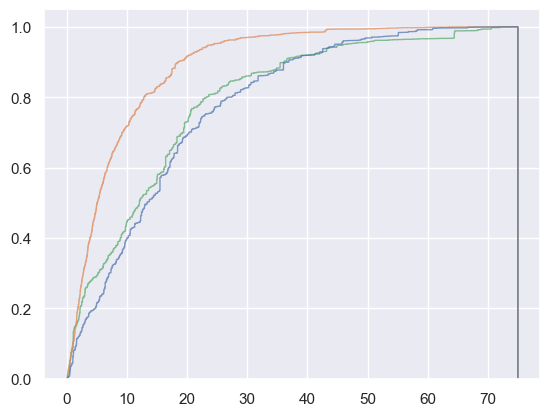

In [13]:
df1=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==4)]
df2=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==1)&(af4['WHYTRP1S']==4)]
df3=af4[(af4['R_AGE_IMP']>=16)&(af4['R_AGE_IMP']<65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==4)]
data1=df1['TRPMILAD']
weight1=df1['WTTRDFIN']
data2=df2['TRPMILAD']
weight2=df2['WTTRDFIN']
data3=df3['TRPMILAD']
weight3=df3['WTTRDFIN']
data=[data1,data2,data3]
weight=[weight1,weight2,weight3]
aa, bins, patches=plt.hist(data, bins=5000,range=(0,75),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight)

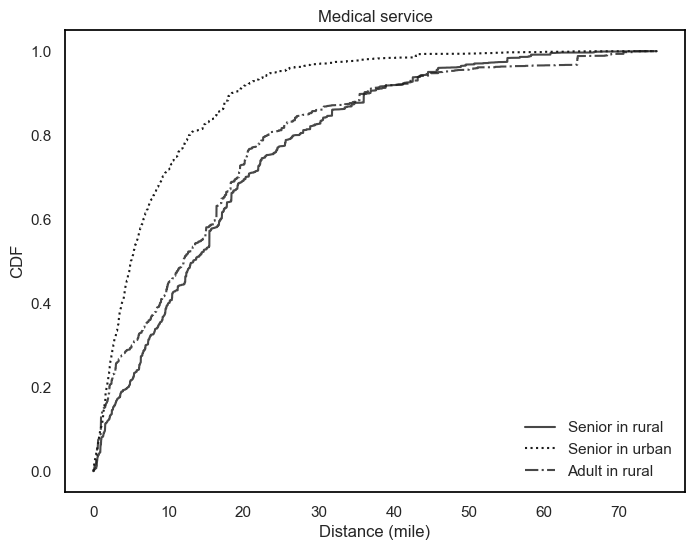

In [23]:
plt.figure(figsize=(8,6))
plt.tight_layout(pad=4.0)
x=np.linspace(0,75,5000)
x_time=np.linspace(0,100,5000)
x_speed=np.linspace(0,80,5000)
label=['Senior in rural','Senior in urban','Adult in rural']
title=['Home','work','Medical service','Shopping','Recreational','Transport someone']
plt.plot(x,aa[0],alpha=0.8,color='k',label=label[0])
plt.plot(x,aa[1],alpha=1,linestyle=':',color='k',label=label[1])
plt.plot(x,aa[2],alpha=0.8,linestyle='-.',color='k',label=label[2])
plt.title(title[2])
plt.xlabel('Distance (mile)')
plt.ylabel('CDF')
plt.legend(facecolor='white',edgecolor='white')
ax = plt.gca()  # Get the current axes
ax.set_facecolor('white')
ax.spines['left'].set_color('black')     # Set the line width for the top spine
ax.spines['top'].set_color('black')     # Set the color for the top spine
ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
ax.spines['right'].set_color('black')# Set the color for the bottom spine

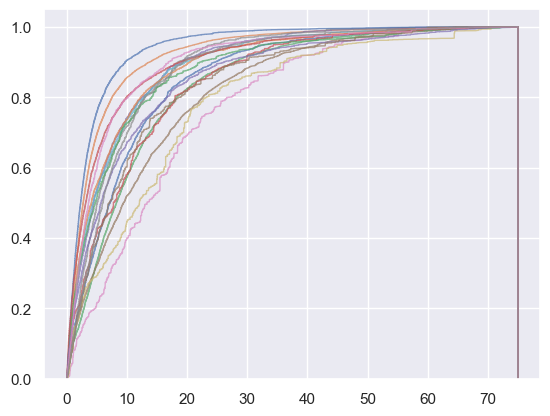

In [6]:
senior_rural_distance=[]
senior_urban_distance=[]
adult_rural_distance=[]
for i in [1,2,4,5,6,7]:
    df1=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    df2=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==1)&(af4['WHYTRP1S']==i)]
    df3=af4[(af4['R_AGE_IMP']>=16)&(af4['R_AGE_IMP']<65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    data1=df1['TRPMILAD']
    weight1=df1['WTTRDFIN']
    data2=df2['TRPMILAD']
    weight2=df2['WTTRDFIN']
    data3=df3['TRPMILAD']
    weight3=df3['WTTRDFIN']
    data=[data1,data2,data3]
    weight=[weight1,weight2,weight3]
    aa, bins, patches=plt.hist(data1, bins=5000,range=(0,75),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight1)
    senior_rural_distance.append(aa)
    bb, bins, patches=plt.hist(data2, bins=5000,range=(0,75),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight2)
    senior_urban_distance.append(bb)
    cc, bins, patches=plt.hist(data3, bins=5000,range=(0,75),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight3)
    adult_rural_distance.append(cc)


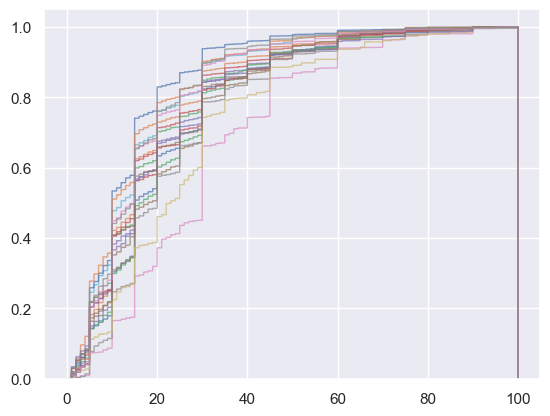

In [7]:
senior_rural_time=[]
senior_urban_time=[]
adult_rural_time=[]
for i in [1,2,4,5,6,7]:
    df1=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    df2=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==1)&(af4['WHYTRP1S']==i)]
    df3=af4[(af4['R_AGE_IMP']>=16)&(af4['R_AGE_IMP']<65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    data1=df1['TRVLCMIN']
    weight1=df1['WTTRDFIN']
    data2=df2['TRVLCMIN']
    weight2=df2['WTTRDFIN']
    data3=df3['TRVLCMIN']
    weight3=df3['WTTRDFIN']
    data=[data1,data2,data3]
    weight=[weight1,weight2,weight3]
    aa1, bins, patches=plt.hist(data1, bins=5000,range=(0,100),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight1)
    senior_rural_time.append(aa1)
    bb1, bins, patches=plt.hist(data2, bins=5000,range=(0,100),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight2)
    senior_urban_time.append(bb1)
    cc1, bins, patches=plt.hist(data3, bins=5000,range=(0,100),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight3)
    adult_rural_time.append(cc1)


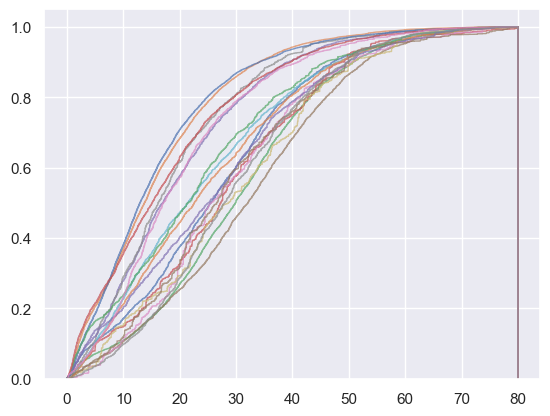

In [8]:
senior_rural_speed=[]
senior_urban_speed=[]
adult_rural_speed=[]
for i in [1,2,4,5,6,7]:
    df1=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    df2=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==1)&(af4['WHYTRP1S']==i)]
    df3=af4[(af4['R_AGE_IMP']>=16)&(af4['R_AGE_IMP']<65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    data1=df1['speed']
    weight1=df1['WTTRDFIN']
    data2=df2['speed']
    weight2=df2['WTTRDFIN']
    data3=df3['speed']
    weight3=df3['WTTRDFIN']
    data=[data1,data2,data3]
    weight=[weight1,weight2,weight3]
    aa2, bins, patches=plt.hist(data1, bins=5000,range=(0,80),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight1)
    senior_rural_speed.append(aa2)
    bb2, bins, patches=plt.hist(data2, bins=5000,range=(0,80),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight2)
    senior_urban_speed.append(bb2)
    cc2, bins, patches=plt.hist(data3, bins=5000,range=(0,80),density=True, cumulative= True, label=title,alpha=0.7,histtype='step',weights=weight3)
    adult_rural_speed.append(cc2)


Text(0.5, 0.98, 'H1')

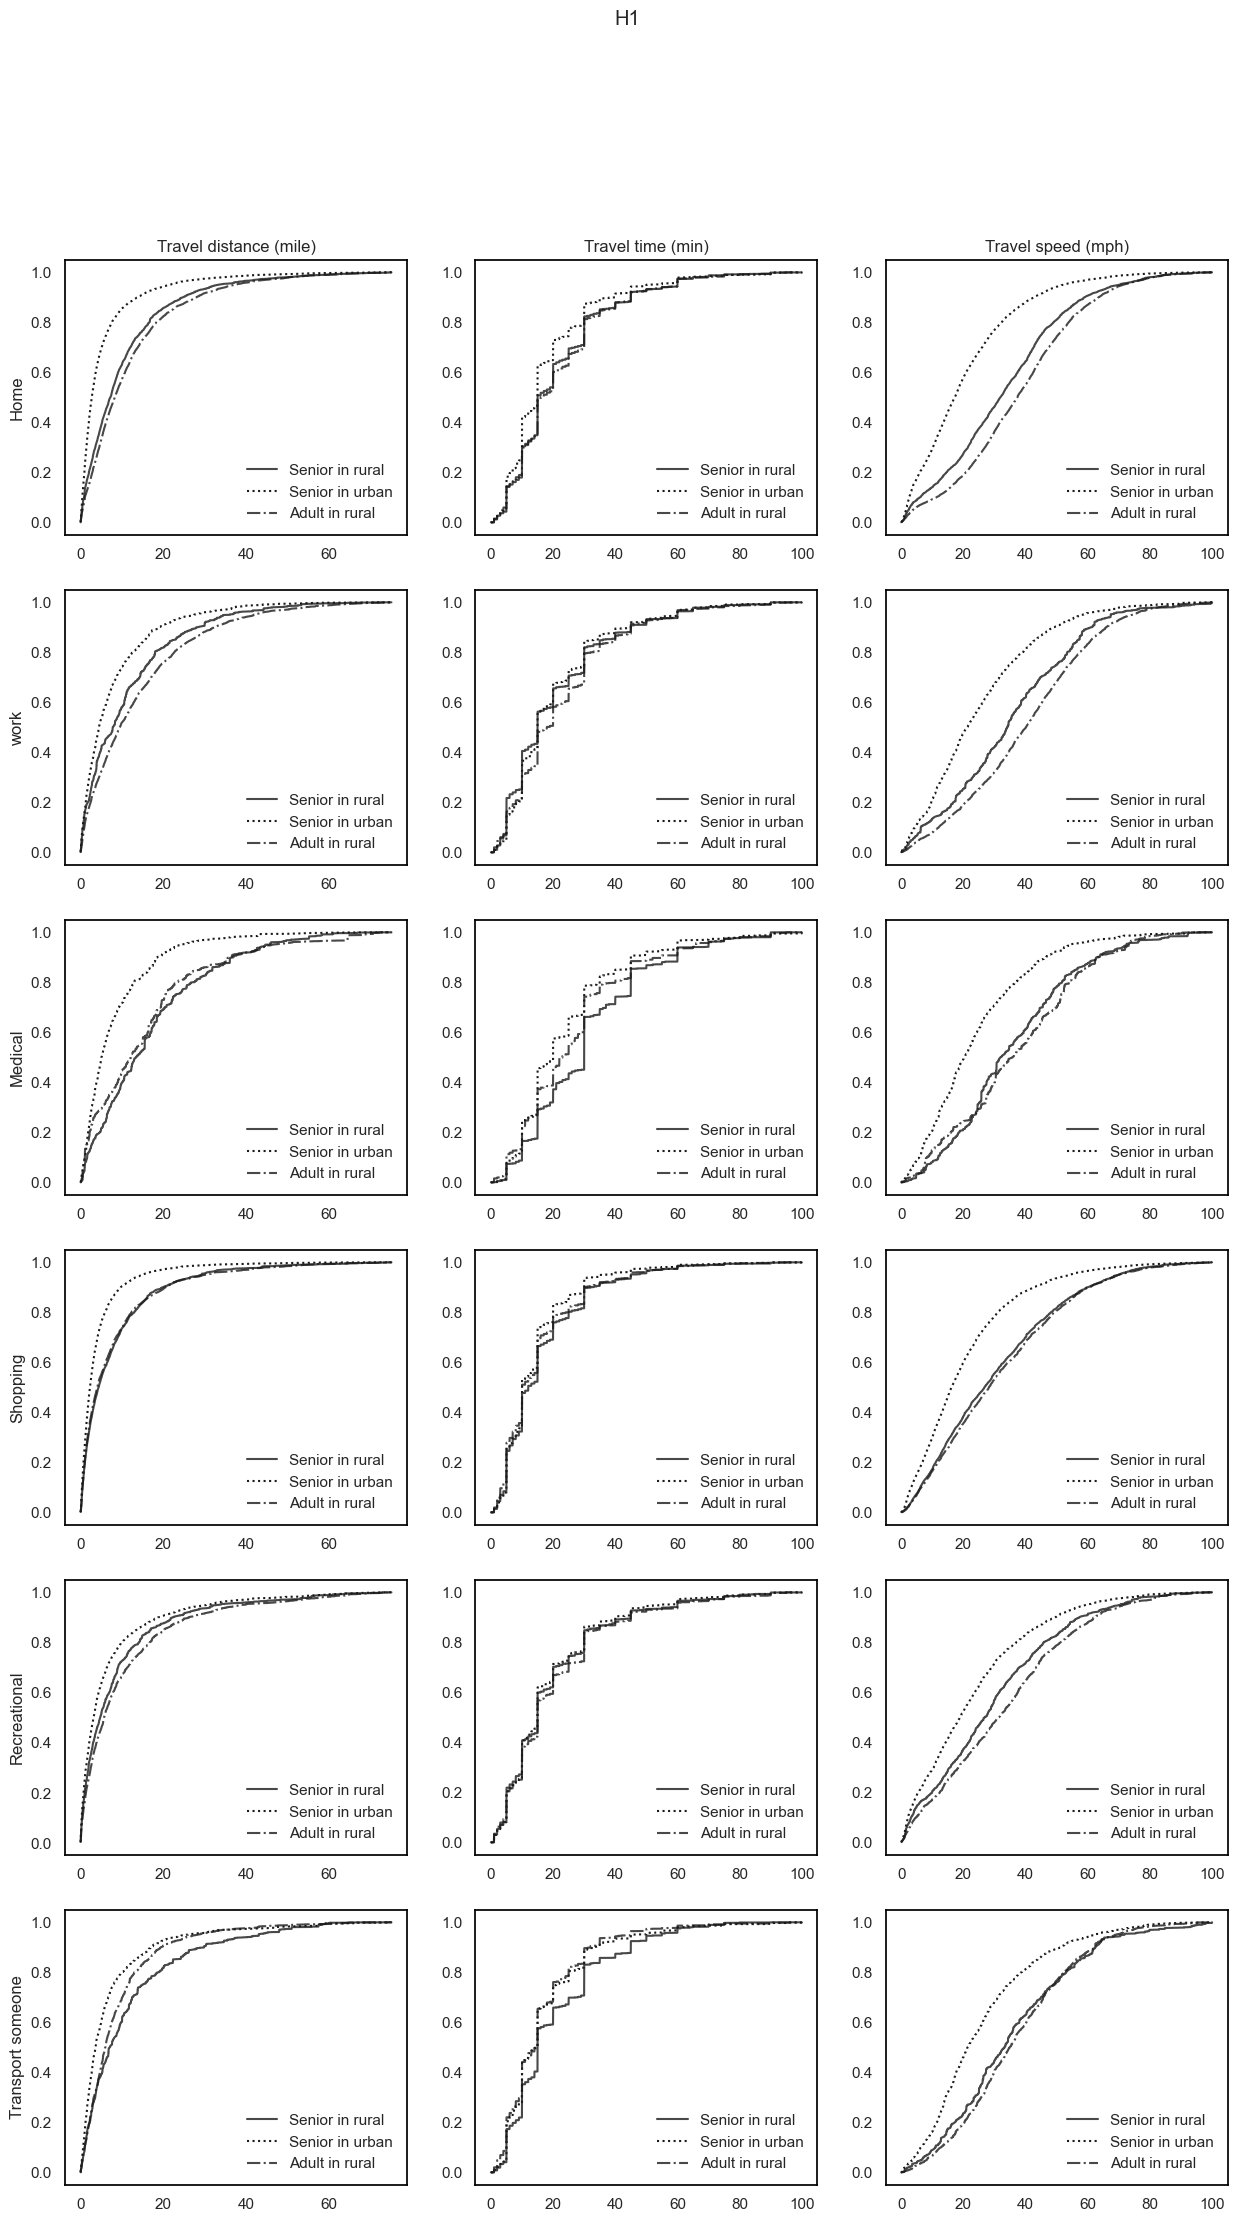

In [9]:
plt.figure(figsize=(15,25))
plt.tight_layout(pad=4.0)
x=np.linspace(0,75,5000)
x_time=np.linspace(0,100,5000)
x_speed=np.linspace(0,80,5000)
label=['Senior in rural','Senior in urban','Adult in rural']
title=['Home','work','Medical','Shopping','Recreational','Transport someone']
for i in range(0,6):
    ax1=plt.subplot(6,3,3*i+1)
    ax1.plot(x,senior_rural_distance[i],alpha=0.8,color='k',label=label[0])
    ax1.plot(x,senior_urban_distance[i],alpha=1,linestyle=':',color='k',label=label[1])
    ax1.plot(x,adult_rural_distance[i],alpha=0.8,linestyle='-.',color='k',label=label[2])
    plt.ylabel(title[i])
    ax1.legend(facecolor='white',edgecolor='white')
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('white')
    ax.spines['left'].set_color('black')     # Set the line width for the top spine
    ax.spines['top'].set_color('black')     # Set the color for the top spine
    ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
    ax.spines['right'].set_color('black')# Set the color for the bottom spine
    ax2=plt.subplot(6,3,3*i+2)
    ax2.plot(x_time,senior_rural_time[i],alpha=0.8,color='k',label=label[0])
    ax2.plot(x_time,senior_urban_time[i],linestyle=':',color='k',label=label[1])
    ax2.plot(x_time,adult_rural_time[i],alpha=0.8,linestyle='-.',color='k',label=label[2])
    ax2.legend(facecolor='white',edgecolor='white')
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('white')
    ax.spines['left'].set_color('black')     # Set the line width for the top spine
    ax.spines['top'].set_color('black')     # Set the color for the top spine
    ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
    ax.spines['right'].set_color('black')# Set the color for the bottom spine
    ax3=plt.subplot(6,3,3*i+3)
    ax3.plot(x_time,senior_rural_speed[i],alpha=0.8,color='k',label=label[0])
    ax3.plot(x_time,senior_urban_speed[i],linestyle=':',color='k',label=label[1])
    ax3.plot(x_time,adult_rural_speed[i],alpha=0.8,linestyle='-.',color='k',label=label[2])
    ax3.legend(facecolor='white',edgecolor='white')
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('white')
    ax.spines['left'].set_color('black')     # Set the line width for the top spine
    ax.spines['top'].set_color('black')     # Set the color for the top spine
    ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
    ax.spines['right'].set_color('black')# Set the color for the bottom spine
ax_1=plt.subplot(6,3,1)
plt.title('Travel distance (mile)')
ax_2=plt.subplot(6,3,2)
plt.title('Travel time (min)')
ax_3=plt.subplot(6,3,3)
plt.title('Travel speed (mph)')
plt.suptitle('H1')

C:\Users\57273\AppData\Local\Temp\ipykernel_16568\1693244916.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i)


Text(0.5, 0.98, 'H1')

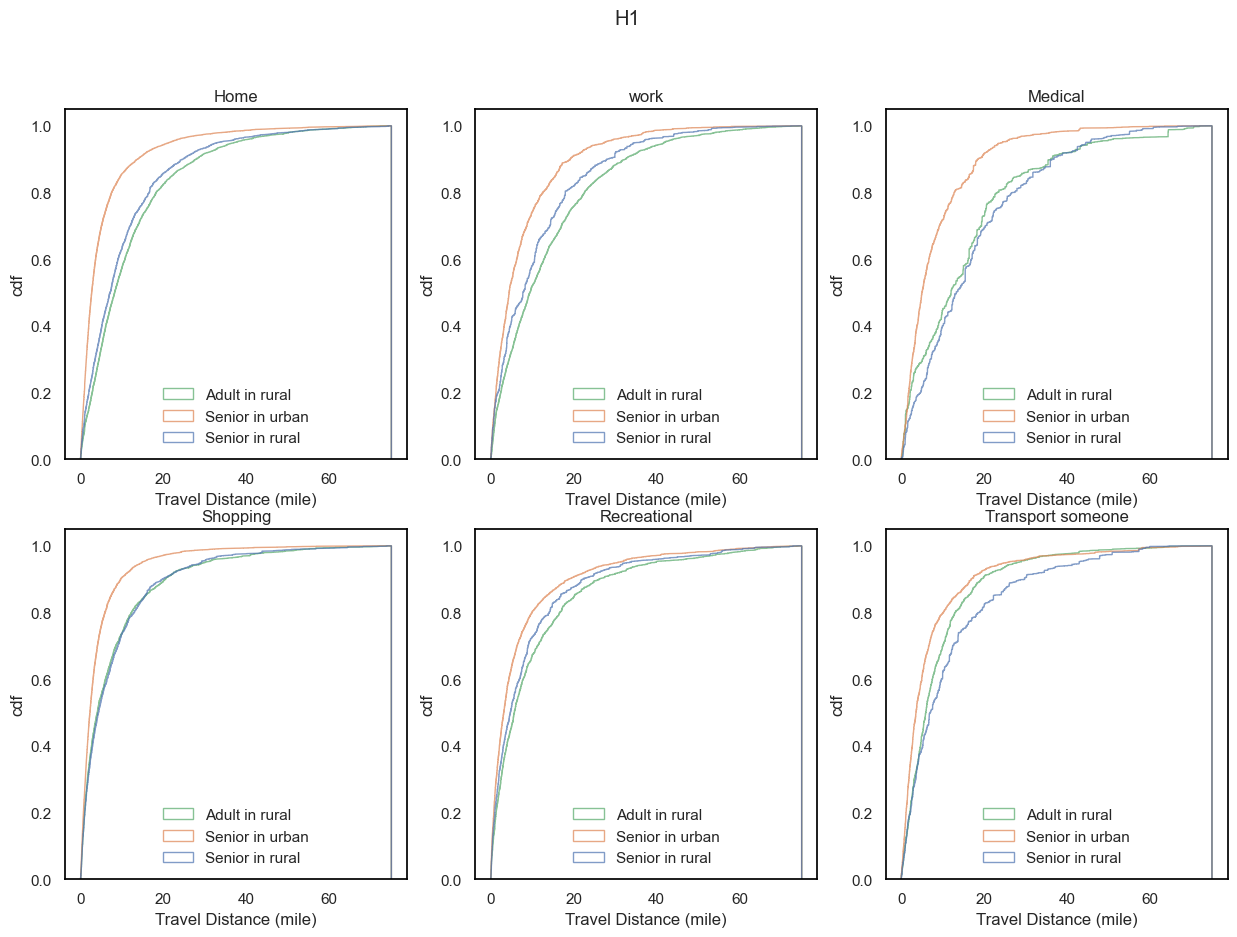

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout(pad=4.0)
for i in [1,2,4,5,6,7]:
    df1=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    df2=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==1)&(af4['WHYTRP1S']==i)]
    df3=af4[(af4['R_AGE_IMP']>=16)&(af4['R_AGE_IMP']<65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    data1=df1['TRPMILAD']
    weight1=df1['WTTRDFIN']
    data2=df2['TRPMILAD']
    weight2=df2['WTTRDFIN']
    data3=df3['TRPMILAD']
    weight3=df3['WTTRDFIN']
    data=[data1,data2,data3]
    weight=[weight1,weight2,weight3]
    label1=['Senior in rural','Senior in urban','Adult in rural']
    title=['Home','work','School','Medical','Shopping','Recreational','Transport someone','meals','others']
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('white')
    ax.spines['left'].set_color('black')     # Set the line width for the top spine
    ax.spines['top'].set_color('black')     # Set the color for the top spine
    ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
    ax.spines['right'].set_color('black')# Set the color for the bottom spine
    if i<3:
        plt.subplot(2,3,i)
        plt.hist(data, bins=5000, density=True,range=(0,75), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weight)
        plt.xlabel('Travel Distance (mile)')
        plt.ylabel('cdf')
        plt.title(title[i-1]) 
        ax = plt.gca()  # Get the current axes
        ax.set_facecolor('white')
        plt.legend(facecolor='white',edgecolor='white')
        plt.grid(False)
    else:
        plt.subplot(2,3,i-1)
        plt.hist(data, bins=5000, density=True,range=(0,75), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weight)
        plt.xlabel('Travel Distance (mile)')
        plt.ylabel('cdf')
        ax = plt.gca()  # Get the current axes
        ax.set_facecolor('white')
        plt.title(title[i-1])
        plt.legend(facecolor='white',edgecolor='white')
        plt.grid(False)
        ax = plt.gca()  # Get the current axes
        ax.set_facecolor('white')
        ax.spines['left'].set_color('black')     # Set the line width for the top spine
        ax.spines['top'].set_color('black')     # Set the color for the top spine
        ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
        ax.spines['right'].set_color('black')# Set the color for the bottom spine
plt.suptitle('H1')



C:\Users\57273\AppData\Local\Temp\ipykernel_16568\3050172340.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i)


Text(0.5, 0.98, 'H1')

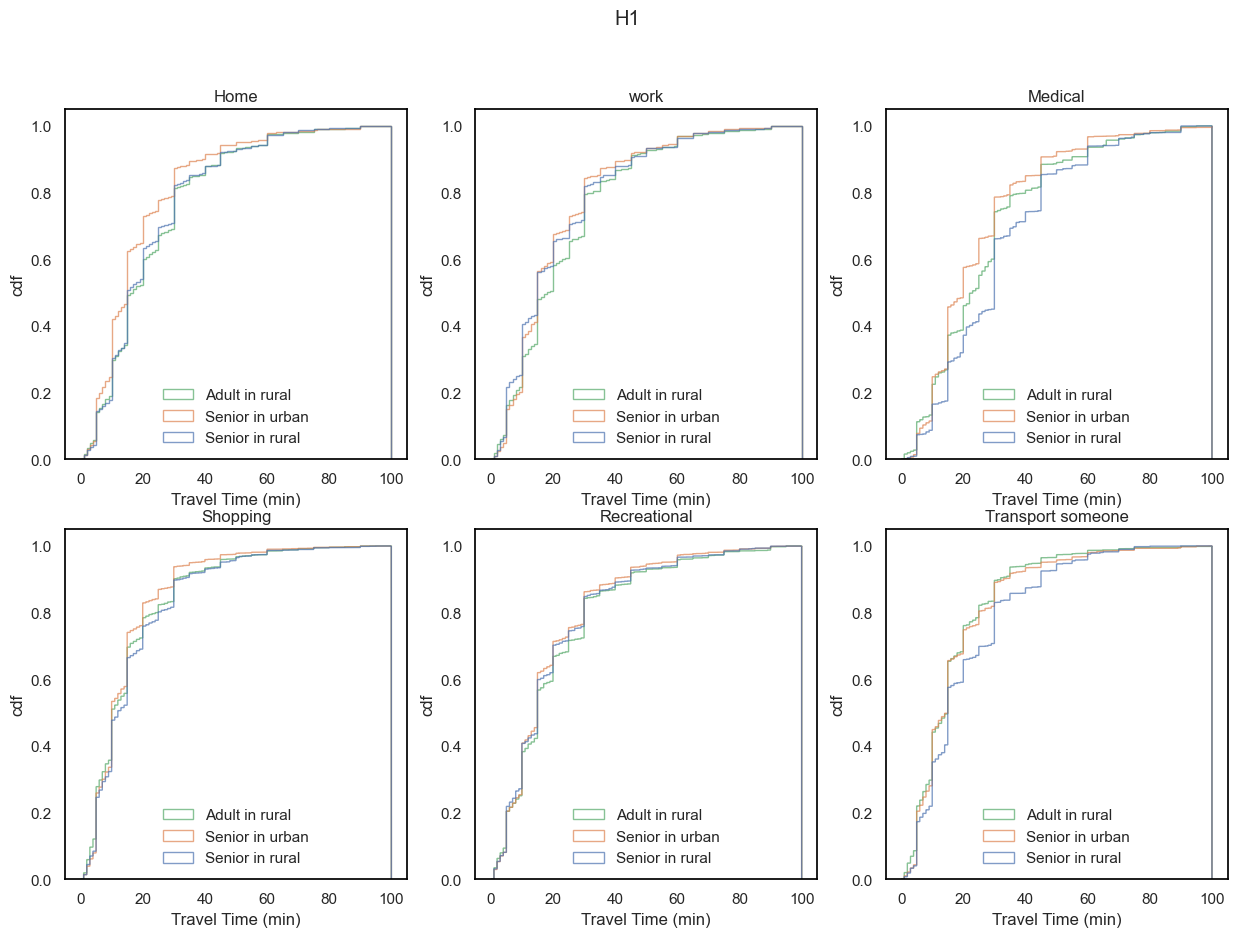

In [11]:
plt.figure(figsize=(15,10))
plt.tight_layout(pad=4.0)
for i in [1,2,4,5,6,7]:
    df1=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    df2=af4[(af4['R_AGE_IMP']>=65)&(af4['URBRUR']==1)&(af4['WHYTRP1S']==i)]
    df3=af4[(af4['R_AGE_IMP']>=16)&(af4['R_AGE_IMP']<65)&(af4['URBRUR']==2)&(af4['WHYTRP1S']==i)]
    data4=df1['TRVLCMIN']
    weight4=df1['WTTRDFIN']
    data5=df2['TRVLCMIN']
    weight5=df2['WTTRDFIN']
    data6=df3['TRVLCMIN']
    weight6=df3['WTTRDFIN']
    dataT=[data4,data5,data6]
    weightT=[weight4,weight5,weight6]
    label1=['Senior in rural','Senior in urban','Adult in rural']
    title=['Home','work','School','Medical','Shopping','Recreational','Transport someone','meals','others']
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('white')
    ax.spines['left'].set_color('black')     # Set the line width for the top spine
    ax.spines['top'].set_color('black')     # Set the color for the top spine
    ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
    ax.spines['right'].set_color('black')# Set the color for the bottom spine
    if i<3:
        plt.subplot(2,3,i)
        plt.hist(dataT, bins=100, density=True,range=(0,100), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weightT)
        plt.xlabel('Travel Time (min)')
        plt.ylabel('cdf')
        plt.title(title[i-1])
        plt.legend(facecolor='white',edgecolor='white')
        plt.grid(False)
    else:
        plt.subplot(2,3,i-1)
        plt.hist(dataT, bins=5000, density=True,range=(0,100), cumulative= True, label=label1,alpha=0.7,histtype='step',weights=weightT)
        plt.xlabel('Travel Time (min)')
        plt.ylabel('cdf')
        plt.title(title[i-1])
        ax = plt.gca()
        ax.set_facecolor('white')
        ax.spines['left'].set_color('black')     # Set the line width for the top spine
        ax.spines['top'].set_color('black')     # Set the color for the top spine
        ax.spines['bottom'].set_color('black')  # Set the line width for the bottom spine
        ax.spines['right'].set_color('black')# Set the color for the bottom spine
        plt.legend(facecolor='white',edgecolor='white')
        plt.grid(False)
plt.suptitle('H1')
    